# GRANT e REVOKE
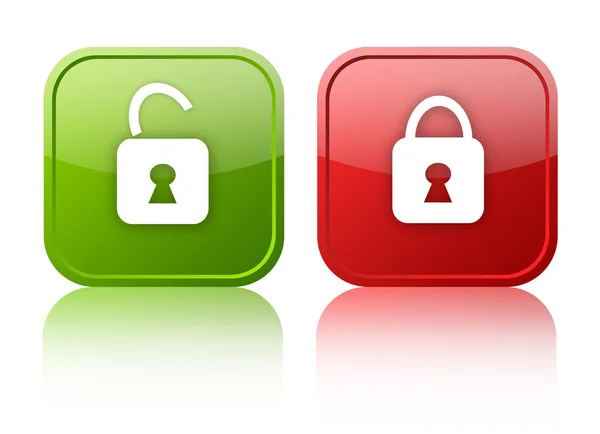

## MySQL: Gerenciamento de Permissões 

Nesta aula, vamos explorar como gerenciar permissões de usuários no MySQL usando Python, focando nas funções GRANT e REVOKE.

#### Passo 1: Instalar bibliotecas

In [5]:
#!pip install mysql
#!pip install --upgrade pandas

#### Passo 2: Importar bibliotecas

In [1]:
import pymysql
import pandas as pd

#### Passo 3: Configurações do banco de dados

In [2]:
# Cria conexão com banco de dados
conn = pymysql.connect(
    host="localhost",
    user="root",
    password="root"
)
cursor = conn.cursor()

#### Passo 4: Criar Banco de Dados

In [3]:
cursor.execute("DROP DATABASE IF EXISTS sistema_empresa") # Remove banco de dados da aula passada
cursor.execute("CREATE DATABASE IF NOT EXISTS sistema_empresa")
cursor.execute("USE sistema_empresa")
print('Banco criado com sucesso!')

Banco criado com sucesso!


#### Passo 5: Criar Tabelas

In [4]:
# Tabela 1: Funcionários (dados sensíveis)
cursor.execute("""
CREATE TABLE funcionarios (
    id INT PRIMARY KEY AUTO_INCREMENT,
    nome VARCHAR(100) NOT NULL,
    email VARCHAR(100),
    cargo VARCHAR(50),
    salario DECIMAL(10,2),
    data_admissao DATE,
    departamento VARCHAR(50)
)
""")
# Tabela 2: Projetos (dados menos sensíveis)
cursor.execute("""
CREATE TABLE projetos (
    id INT PRIMARY KEY AUTO_INCREMENT,
    nome_projeto VARCHAR(100) NOT NULL,
    descricao TEXT,
    orcamento DECIMAL(12,2),
    data_inicio DATE,
    data_termino DATE,
    status VARCHAR(20)
)
""")
        
# Tabela 3: Departamentos (dados públicos)
cursor.execute("""
    CREATE TABLE departamentos (
    id INT PRIMARY KEY AUTO_INCREMENT,
    nome_departamento VARCHAR(100) NOT NULL,
    gerente VARCHAR(100),
    orcamento_anual DECIMAL(12,2),
    telefone VARCHAR(20)
)
""")

print("Tabelas criadas com sucesso")

Tabelas criadas com sucesso


#### Passo 6: Inserir dados

In [5]:
# Funcionários
funcionarios = [
    ('João Silva', 'joao.silva@empresa.com', 'Gerente de TI', 15000.00, '2020-01-15', 'TI'),
    ('Maria Santos', 'maria.santos@empresa.com', 'Analista RH', 8000.00, '2021-03-20', 'RH'),
    ('Pedro Oliveira', 'pedro.oliveira@empresa.com', 'Desenvolvedor', 12000.00, '2019-11-10', 'TI'),
    ('Ana Costa', 'ana.costa@empresa.com', 'Assistente Admin', 4500.00, '2022-06-01', 'Administrativo')
]
        
cursor.executemany(""" INSERT INTO funcionarios (nome, email, cargo, salario, data_admissao, departamento) 
VALUES (%s, %s, %s, %s, %s, %s)""", funcionarios)
        
# Projetos
projetos = [
    ('Sistema ERP', 'Desenvolvimento do sistema integrado', 500000.00, '2023-01-01', '2024-12-31', 'Em Andamento'),
    ('Site Corporativo', 'Redesign do site da empresa', 120000.00, '2023-03-15', '2023-09-30', 'Concluído'),
    ('App Mobile', 'Desenvolvimento do aplicativo', 300000.00, '2023-06-01', '2024-06-30', 'Planejamento')
]
        
cursor.executemany(""" INSERT INTO projetos (nome_projeto, descricao, orcamento, data_inicio, data_termino, status)
VALUES (%s, %s, %s, %s, %s, %s)""", projetos)
        
# Departamentos
departamentos = [
    ('TI', 'João Silva', 1000000.00, '(11) 9999-8888'),
    ('RH', 'Maria Santos', 500000.00, '(11) 9999-7777'),
    ('Administrativo', 'Carlos Souza', 300000.00, '(11) 9999-6666')
]

cursor.executemany(""" INSERT INTO departamentos (nome_departamento, gerente, orcamento_anual, telefone)
VALUES (%s, %s, %s, %s)""", departamentos)

conn.commit()

print('Dados inseridos com sucesso!')

Dados inseridos com sucesso!


#### Passo 7: Visualizar dados

In [10]:
cursor.execute('SELECT * FROM funcionarios;')
display(pd.DataFrame(cursor.fetchall(), columns = [desc[0] for desc in cursor.description]))

,id,nome,email,cargo,salario,data_admissao,departamento
0,1,João Silva,joao.silva@empresa.com,Gerente de TI,15000.00,2020-01-15,TI
1,2,Maria Santos,maria.santos@empresa.com,Analista RH,8000.00,2021-03-20,RH
2,3,Pedro Oliveira,pedro.oliveira@empresa.com,Desenvolvedor,12000.00,2019-11-10,TI
3,4,Ana Costa,ana.costa@empresa.com,Assistente Admin,4500.00,2022-06-01,Administrativo


In [11]:
cursor.execute('SELECT * FROM departamentos;')
display(pd.DataFrame(cursor.fetchall(), columns = [desc[0] for desc in cursor.description]))

,id,nome_departamento,gerente,orcamento_anual,telefone
0,1,TI,João Silva,1000000.00,(11) 9999-8888
1,2,RH,Maria Santos,500000.00,(11) 9999-7777
2,3,Administrativo,Carlos Souza,300000.00,(11) 9999-6666


In [12]:
cursor.execute('SELECT * FROM projetos;')
display(pd.DataFrame(cursor.fetchall(), columns = [desc[0] for desc in cursor.description]))

,id,nome_projeto,descricao,orcamento,data_inicio,data_termino,status
0,1,Sistema ERP,Desenvolvimento do sistema integrado,500000.00,2023-01-01,2024-12-31,Em Andamento
1,2,Site Corporativo,Redesign do site da empresa,120000.00,2023-03-15,2023-09-30,Concluído
2,3,App Mobile,Desenvolvimento do aplicativo,300000.00,2023-06-01,2024-06-30,Planejamento


#### Passo 8: Criando Usuários

In [13]:
# Perfil 1: Administrador (acesso total)

# Usuário e senha
adm = ("admin_empresa", "admin123")

cursor.execute(f"DROP USER IF EXISTS '{adm[0]}'@'localhost'")
cursor.execute(f"CREATE USER '{adm[0]}'@'localhost' IDENTIFIED BY '{adm[1]}'")

print("Administrador criado")

Administrador criado


In [27]:
# Perfil 2: Gerente (acesso a quase tudo, exceto salários)

# Usuário e senha
ger = ('gerente_geral','gerente123')

cursor.execute(f"DROP USER IF EXISTS '{ger[0]}'@'localhost'")
cursor.execute(f"CREATE USER '{ger[0]}'@'localhost' IDENTIFIED BY '{ger[1]}'")

print("Gerente criado")

Gerente criado


In [15]:
# Perfil 3: Analista de RH (acesso limitado a funcionários)

# Usuário e senha
rh = ('analista_rh','rh123')

cursor.execute(f"DROP USER IF EXISTS '{rh[0]}'@'localhost'")
cursor.execute(f"CREATE USER '{rh[0]}'@'localhost' IDENTIFIED BY '{rh[1]}'")

print("Analista RH criado")

Analista RH criado


In [16]:
# Perfil 4: Desenvolvedor (acesso apenas a projetos)

# Usuário e senha
dev = ('dev_ti','dev123')

cursor.execute(f"DROP USER IF EXISTS '{dev[0]}'@'localhost'")
cursor.execute(f"CREATE USER '{dev[0]}'@'localhost' IDENTIFIED BY '{dev[1]}'")

print("Desenvolvedor criado")

Desenvolvedor criado


In [17]:
# Perfil 5: Estagiário (apenas leitura em dados não sensíveis)

# Usuário e senha
est = ('estagiario','estagio123')

cursor.execute(f"DROP USER IF EXISTS '{est[0]}'@'localhost'")
cursor.execute(f"CREATE USER '{est[0]}'@'localhost' IDENTIFIED BY '{est[1]}'")

print("Estagiário criado")

Estagiário criado


In [18]:
# Verifica todos os perfis criados
cursor.execute("SELECT user, host FROM mysql.user WHERE user NOT LIKE 'mysql%'")
cursor.fetchall()

(('admin_empresa', 'localhost'),
 ('analista_rh', 'localhost'),
 ('dev_ti', 'localhost'),
 ('estagiario', 'localhost'),
 ('gerente_geral', 'localhost'),
 ('root', 'localhost'))

#### Passo 9: GRANT - Concedendo permissões

In [20]:
# Perfil 1: Administrador (acesso total)
cursor.execute(f"GRANT ALL PRIVILEGES ON sistema_empresa.* TO '{adm[0]}'@'localhost'")
print('Permissão configurada')

Permissão configurada


In [29]:
# Perfil 2: Gerente (acesso a quase tudo, exceto salários)
# Permissões para gerente
cursor.execute(f"GRANT SELECT, INSERT, UPDATE, DELETE ON sistema_empresa.projetos TO '{ger[0]}'@'localhost'")
cursor.execute(f"GRANT SELECT, INSERT, UPDATE, DELETE ON sistema_empresa.departamentos TO '{ger[0]}'@'localhost'")
cursor.execute(f"GRANT SELECT (id, nome, email, cargo, data_admissao, departamento) ON sistema_empresa.funcionarios TO '{ger[0]}'@'localhost'")

print('Permissão configurada')

Permissão configurada


In [30]:
# Perfil 3: Analista de RH (acesso limitado a funcionários)
# Permissões para rh
cursor.execute(f"GRANT SELECT (id, nome, email, cargo, data_admissao, departamento) ON sistema_empresa.funcionarios TO '{rh[0]}'@'localhost'")
cursor.execute(f"GRANT SELECT ON sistema_empresa.departamentos TO '{rh[0]}'@'localhost'")
print('Permissão configurada')

Permissão configurada


In [31]:
# Perfil 4: Desenvolvedor (acesso apenas a projetos)
cursor.execute(f"GRANT SELECT ON sistema_empresa.projetos TO '{dev[0]}'@'localhost'")
print('Permissão configurada')

Permissão configurada


In [32]:
# Perfil 5: Estagiário (apenas leitura em dados não sensíveis)
cursor.execute(f"GRANT SELECT ON sistema_empresa.departamentos TO '{est[0]}'@'localhost'")
cursor.execute(f"GRANT SELECT (nome_projeto, descricao, status) ON sistema_empresa.projetos TO '{est[0]}'@'localhost'")
print('Permissão configurada')

Permissão configurada


In [33]:
# Aplicar todas as permissões
cursor.execute("FLUSH PRIVILEGES")
print('Permissões aplicadas com sucesso')

Permissões aplicadas com sucesso


#### Passo 10: Testando as permissões de cada usuário

In [34]:
# Encerrar conexão com banco de dados
conn.close()

In [35]:
def conectar_usuario(usuario, senha, banco='sistema_empresa'):
    conn = pymysql.connect(
        host="localhost",
        user=usuario,
        password=senha,
        database=banco
    )
    cursor = conn.cursor()
    print(f"Conectado como: {usuario}")
    return conn, cursor

In [36]:
usuario = ger
conn, cursor = conectar_usuario(*(usuario))

Conectado como: gerente_geral


In [37]:
# Tentar SELECT básico
cursor.execute("SELECT DATABASE(), USER()")
cursor.fetchone()

('sistema_empresa', 'gerente_geral@localhost')

#### Teste: CRUD (Create, Read, Upadate, Delete)
- **SELECT:** Responsabilidade nível 1
- **INSERT:** Responsabilidade nível 2
- **UPDATE:** Responsabilidade nível 3
- **DELETE:** Responsabilidade nível 4

In [41]:
try:
    cursor.execute(f"DESCRIBE funcionarios")
    colunas = ",".join([desc[0] for desc in cursor.fetchall()])
    cursor.execute(f"SELECT {colunas} FROM funcionarios;")
    display(pd.DataFrame(cursor.fetchall(), columns = [desc[0] for desc in cursor.description]))
except:
    print(f'Usuário \033[1m{usuario[0]}\033[0m não tem permissão para acessar a tabela funcionarios')

,id,nome,email,cargo,data_admissao,departamento
0,1,João Silva,joao.silva@empresa.com,Gerente de TI,2020-01-15,TI
1,2,Maria Santos,maria.santos@empresa.com,Analista RH,2021-03-20,RH
2,3,Pedro Oliveira,pedro.oliveira@empresa.com,Desenvolvedor,2019-11-10,TI
3,4,Ana Costa,ana.costa@empresa.com,Assistente Admin,2022-06-01,Administrativo


In [42]:
try:
    dados = ('Rafael Orsi', 'rafael.orsi@empresa.com', 'Desenvolvedor', 12000, '2025-01-01', 'TI')
    cursor.execute(""" INSERT INTO funcionarios (nome, email, cargo, salario, data_admissao, departamento) 
    VALUES (%s, %s, %s, %s, %s, %s)""", dados)
    print('Novo registro')
    cursor.execute('SELECT * FROM funcionarios;')
    display(pd.DataFrame(cursor.fetchall(), columns = [desc[0] for desc in cursor.description]))
except:
    print(f'Usuário \033[1m{usuario[0]}\033[0m não tem permissão para inserir dados da tabela funcionarios')

Usuário gerente_geral não tem permissão para inserir dados da tabela funcionarios


In [43]:
try:
    cursor.execute("UPDATE funcionarios SET email = %s WHERE nome = %s", ('rafael.orsi25@empresa.com', 'Rafael Orsi'))
    print('Registro modificado')
    cursor.execute('SELECT * FROM funcionarios;')
    display(pd.DataFrame(cursor.fetchall(), columns = [desc[0] for desc in cursor.description]))
except:
    print(f'Usuário \033[1m{usuario[0]}\033[0m não tem permissão para modificar dados da tabela funcionarios')

Usuário gerente_geral não tem permissão para modificar dados da tabela funcionarios


In [44]:
try:
    cursor.execute("UPDATE funcionarios SET email = %s WHERE nome = %s", ('rafael.orsi25@empresa.com', 'Rafael Orsi'))
    print('Registro modificado')
    cursor.execute('SELECT * FROM funcionarios;')
    display(pd.DataFrame(cursor.fetchall(), columns = [desc[0] for desc in cursor.description]))
except:
    print(f'Usuário \033[1m{usuario[0]}\033[0m não tem permissão para modificar dados da tabela funcionarios')

Usuário gerente_geral não tem permissão para modificar dados da tabela funcionarios


In [45]:
try:
    cursor.execute("DELETE FROM funcionarios WHERE nome = %s", 'Rafael Orsi')
    print('Registro excluído')
    cursor.execute('SELECT * FROM funcionarios;')
    display(pd.DataFrame(cursor.fetchall(), columns = [desc[0] for desc in cursor.description]))
except:
    print(f'Usuário \033[1m{usuario[0]}\033[0m não tem permissão para excluir dados da tabela funcionarios')

Usuário gerente_geral não tem permissão para excluir dados da tabela funcionarios


#### Faça o mesmo pra as tabelas projetos e departamentos

In [46]:
try:
    cursor.execute(f"DESCRIBE projetos")
    colunas = ",".join([desc[0] for desc in cursor.fetchall()])
    cursor.execute(f"SELECT {colunas} FROM projetos;")
    display(pd.DataFrame(cursor.fetchall(), columns = [desc[0] for desc in cursor.description]))
    try:
        dados = ('Banco de Dados', 'Modelagem', 15000.00, '2025-01-01', '2026-12-31', 'Em Andamento')
        cursor.execute(""" INSERT INTO projetos (nome_projeto, descricao, orcamento, data_inicio, data_termino, status) 
        VALUES (%s, %s, %s, %s, %s, %s)""", dados)
        print('Novo registro')
        cursor.execute('SELECT * FROM projetos;')
        display(pd.DataFrame(cursor.fetchall(), columns = [desc[0] for desc in cursor.description]))
    except:
        print(f'Usuário \033[1m{usuario[0]}\033[0m não tem permissão para inserir dados da tabela projetos')
    try:
        cursor.execute("UPDATE projetos SET nome_projeto = %s WHERE nome_projeto = %s", ('Cloud', 'Banco de Dados'))
        print('Registro modificado')
        cursor.execute('SELECT * FROM projetos;')
        display(pd.DataFrame(cursor.fetchall(), columns = [desc[0] for desc in cursor.description]))
    except:
        print(f'Usuário \033[1m{usuario[0]}\033[0m não tem permissão para modificar dados da tabela projetos')
    try:
        cursor.execute("DELETE FROM projetos WHERE nome_projeto = %s", 'Cloud')
        print('Registro excluído')
        cursor.execute('SELECT * FROM projetos;')
        display(pd.DataFrame(cursor.fetchall(), columns = [desc[0] for desc in cursor.description]))
    except:
        print(f'Usuário \033[1m{usuario[0]}\033[0m não tem permissão para excluir dados da tabela projetos')
except:
    print(f'Usuário \033[1m{usuario[0]}\033[0m não tem permissão para acessar a tabela projetos')

,id,nome_projeto,descricao,orcamento,data_inicio,data_termino,status
0,1,Sistema ERP,Desenvolvimento do sistema integrado,500000.00,2023-01-01,2024-12-31,Em Andamento
1,2,Site Corporativo,Redesign do site da empresa,120000.00,2023-03-15,2023-09-30,Concluído
2,3,App Mobile,Desenvolvimento do aplicativo,300000.00,2023-06-01,2024-06-30,Planejamento


Novo registro


,id,nome_projeto,descricao,orcamento,data_inicio,data_termino,status
0,1,Sistema ERP,Desenvolvimento do sistema integrado,500000.00,2023-01-01,2024-12-31,Em Andamento
1,2,Site Corporativo,Redesign do site da empresa,120000.00,2023-03-15,2023-09-30,Concluído
2,3,App Mobile,Desenvolvimento do aplicativo,300000.00,2023-06-01,2024-06-30,Planejamento
3,5,Banco de Dados,Modelagem,15000.00,2025-01-01,2026-12-31,Em Andamento


Registro modificado


,id,nome_projeto,descricao,orcamento,data_inicio,data_termino,status
0,1,Sistema ERP,Desenvolvimento do sistema integrado,500000.00,2023-01-01,2024-12-31,Em Andamento
1,2,Site Corporativo,Redesign do site da empresa,120000.00,2023-03-15,2023-09-30,Concluído
2,3,App Mobile,Desenvolvimento do aplicativo,300000.00,2023-06-01,2024-06-30,Planejamento
3,5,Cloud,Modelagem,15000.00,2025-01-01,2026-12-31,Em Andamento


Registro excluído


,id,nome_projeto,descricao,orcamento,data_inicio,data_termino,status
0,1,Sistema ERP,Desenvolvimento do sistema integrado,500000.00,2023-01-01,2024-12-31,Em Andamento
1,2,Site Corporativo,Redesign do site da empresa,120000.00,2023-03-15,2023-09-30,Concluído
2,3,App Mobile,Desenvolvimento do aplicativo,300000.00,2023-06-01,2024-06-30,Planejamento


In [27]:
try:
    cursor.execute(f"DESCRIBE departamentos")
    colunas = ",".join([desc[0] for desc in cursor.fetchall()])
    cursor.execute(f"SELECT {colunas} FROM departamentos;")
    display(pd.DataFrame(cursor.fetchall(), columns = [desc[0] for desc in cursor.description]))
    try:
        dados = ('Vendas', 'Miguel', 1500000, '(11) 9111-1111')
        cursor.execute(""" INSERT INTO departamentos (nome_departamento, gerente, orcamento_anual, telefone) 
        VALUES (%s, %s, %s, %s)""", dados)
        print('Novo registro')
        cursor.execute('SELECT * FROM departamentos;')
        display(pd.DataFrame(cursor.fetchall(), columns = [desc[0] for desc in cursor.description]))
    except:
        print(f'Usuário \033[1m{usuario[0]}\033[0m não tem permissão para inserir dados da tabela departamentos')
    try:
        cursor.execute("UPDATE departamentos SET nome_departamento = %s WHERE nome_departamento = %s", ('Manutenção', 'Vendas'))
        print('Registro modificado')
        cursor.execute('SELECT * FROM departamentos;')
        display(pd.DataFrame(cursor.fetchall(), columns = [desc[0] for desc in cursor.description]))
    except:
        print(f'Usuário \033[1m{usuario[0]}\033[0m não tem permissão para modificar dados da tabela departamentos')
    try:
        cursor.execute("DELETE FROM departamentos WHERE nome_departamento = %s", 'Manutenção')
        print('Registro excluído')
        cursor.execute('SELECT * FROM departamentos;')
        display(pd.DataFrame(cursor.fetchall(), columns = [desc[0] for desc in cursor.description]))
    except:
        print(f'Usuário \033[1m{usuario[0]}\033[0m não tem permissão para excluir dados da tabela departamentos')
except:
    print(f'Usuário \033[1m{usuario[0]}\033[0m não tem permissão para acessar a tabela departamentos')

,id,nome_departamento,gerente,orcamento_anual,telefone
0,1,TI,João Silva,1000000.00,(11) 9999-8888
1,2,RH,Maria Santos,500000.00,(11) 9999-7777
2,3,Administrativo,Carlos Souza,300000.00,(11) 9999-6666


Novo registro


,id,nome_departamento,gerente,orcamento_anual,telefone
0,1,TI,João Silva,1000000.00,(11) 9999-8888
1,2,RH,Maria Santos,500000.00,(11) 9999-7777
2,3,Administrativo,Carlos Souza,300000.00,(11) 9999-6666
3,4,Vendas,Miguel,1500000.00,(11) 9111-1111


Registro modificado


,id,nome_departamento,gerente,orcamento_anual,telefone
0,1,TI,João Silva,1000000.00,(11) 9999-8888
1,2,RH,Maria Santos,500000.00,(11) 9999-7777
2,3,Administrativo,Carlos Souza,300000.00,(11) 9999-6666
3,4,Manutenção,Miguel,1500000.00,(11) 9111-1111


Usuário gerente_geral não tem permissão para excluir dados da tabela departamentos


#### Passo 11: REVOKE - Revogando permissões
- A função REVOKE só pode ser utilizada pelo super usuário (root)
- A função REVOKE deve ser utilizada para remover a permissão da tabela inteira.
- Caso queira remover a permissão em apenas uma coluna, deverá fazer o REVOKE da tabela inteira e depois fazer o GRANT explícito das colunas com permissão.

Sintaxe: `cursor.execute("REVOKE privilegios ON database.tabela FROM 'usuario'@'host'")`

In [48]:
# Cria conexão com banco de dados usando o super usuário
conn, cursor = conectar_usuario('root','root')

Conectado como: root


In [49]:
# Remover multiplos privilégios
cursor.execute("REVOKE UPDATE, DELETE ON sistema_empresa.funcionarios
FROM 'gerente_geral'@'localhost'")
cursor.execute("FLUSH PRIVILEGES")
print('Privilégios Revogados')

Privilégios Revogados


In [50]:
# Remover todos os privilégios (recomendado
cursor.execute("REVOKE ALL PRIVILEGES ON sistema_empresa.funcionarios FROM 'gerente_geral'@'localhost'")
cursor.execute("FLUSH PRIVILEGES")
print('Privilégios revogados')

Privilégios revogados


#### Passo 12: Mostrar Privilégios

In [32]:
cursor.execute("SHOW GRANTS FOR 'gerente_geral'@'localhost'")
cursor.fetchall()

(('GRANT USAGE ON *.* TO `gerente_geral`@`localhost`',),
 ('GRANT SELECT, INSERT, UPDATE ON `sistema_empresa`.`departamentos` TO `gerente_geral`@`localhost`',),
 ('GRANT SELECT, INSERT, UPDATE, DELETE ON `sistema_empresa`.`projetos` TO `gerente_geral`@`localhost`',))

In [33]:
cursor.execute("SELECT user, host FROM mysql.user WHERE user NOT LIKE 'mysql%'")

print('====== PRIVILÉGIOS DOS USUÁRIOS =======')
for user, host in cursor.fetchall():
    print(f"\n Usuário: {user}@{host}")
        
    # Ver privilégios globais
    cursor.execute(f"SHOW GRANTS FOR '{user}'@'{host}'")       
    for grant in cursor.fetchall():
        print(f"{grant[0]}")

====== PRIVILÉGIOS DOS USUÁRIOS =======

 Usuário: admin_empresa@localhost
GRANT USAGE ON *.* TO `admin_empresa`@`localhost`
GRANT ALL PRIVILEGES ON `sistema_empresa`.* TO `admin_empresa`@`localhost`

 Usuário: analista_rh@localhost
GRANT USAGE ON *.* TO `analista_rh`@`localhost`
GRANT SELECT ON `sistema_empresa`.`departamentos` TO `analista_rh`@`localhost`
GRANT SELECT (`cargo`, `data_admissao`, `departamento`, `email`, `id`, `nome`) ON `sistema_empresa`.`funcionarios` TO `analista_rh`@`localhost`

 Usuário: dev_ti@localhost
GRANT USAGE ON *.* TO `dev_ti`@`localhost`
GRANT SELECT ON `sistema_empresa`.`projetos` TO `dev_ti`@`localhost`

 Usuário: estagiario@localhost
GRANT USAGE ON *.* TO `estagiario`@`localhost`
GRANT SELECT ON `sistema_empresa`.`departamentos` TO `estagiario`@`localhost`
GRANT SELECT (`descricao`, `nome_projeto`, `status`) ON `sistema_empresa`.`projetos` TO `estagiario`@`localhost`

 Usuário: gerente_geral@localhost
GRANT USAGE ON *.* TO `gerente_geral`@`localhost`
G

<div>
<img src=attachment:1d162c51-2291-4401-9dfa-1a3512f11462.png width="600"/>
</div>

## Interface WEb para Demonstrar GRANT e REVOKE

Nesta seção, vamos construir uma interface web em **Python (Streamlit)** que permitirá:

1. Fazer **login** no banco com diferentes usuários.
2. Executar comandos SQL (SELECT, INSERT, UPDATE, DELETE).
3. Visualizar os resultados em uma tabela.
4. Demonstrar na prática as permissões concedidas ou revogadas com **GRANT** e **REVOKE**.
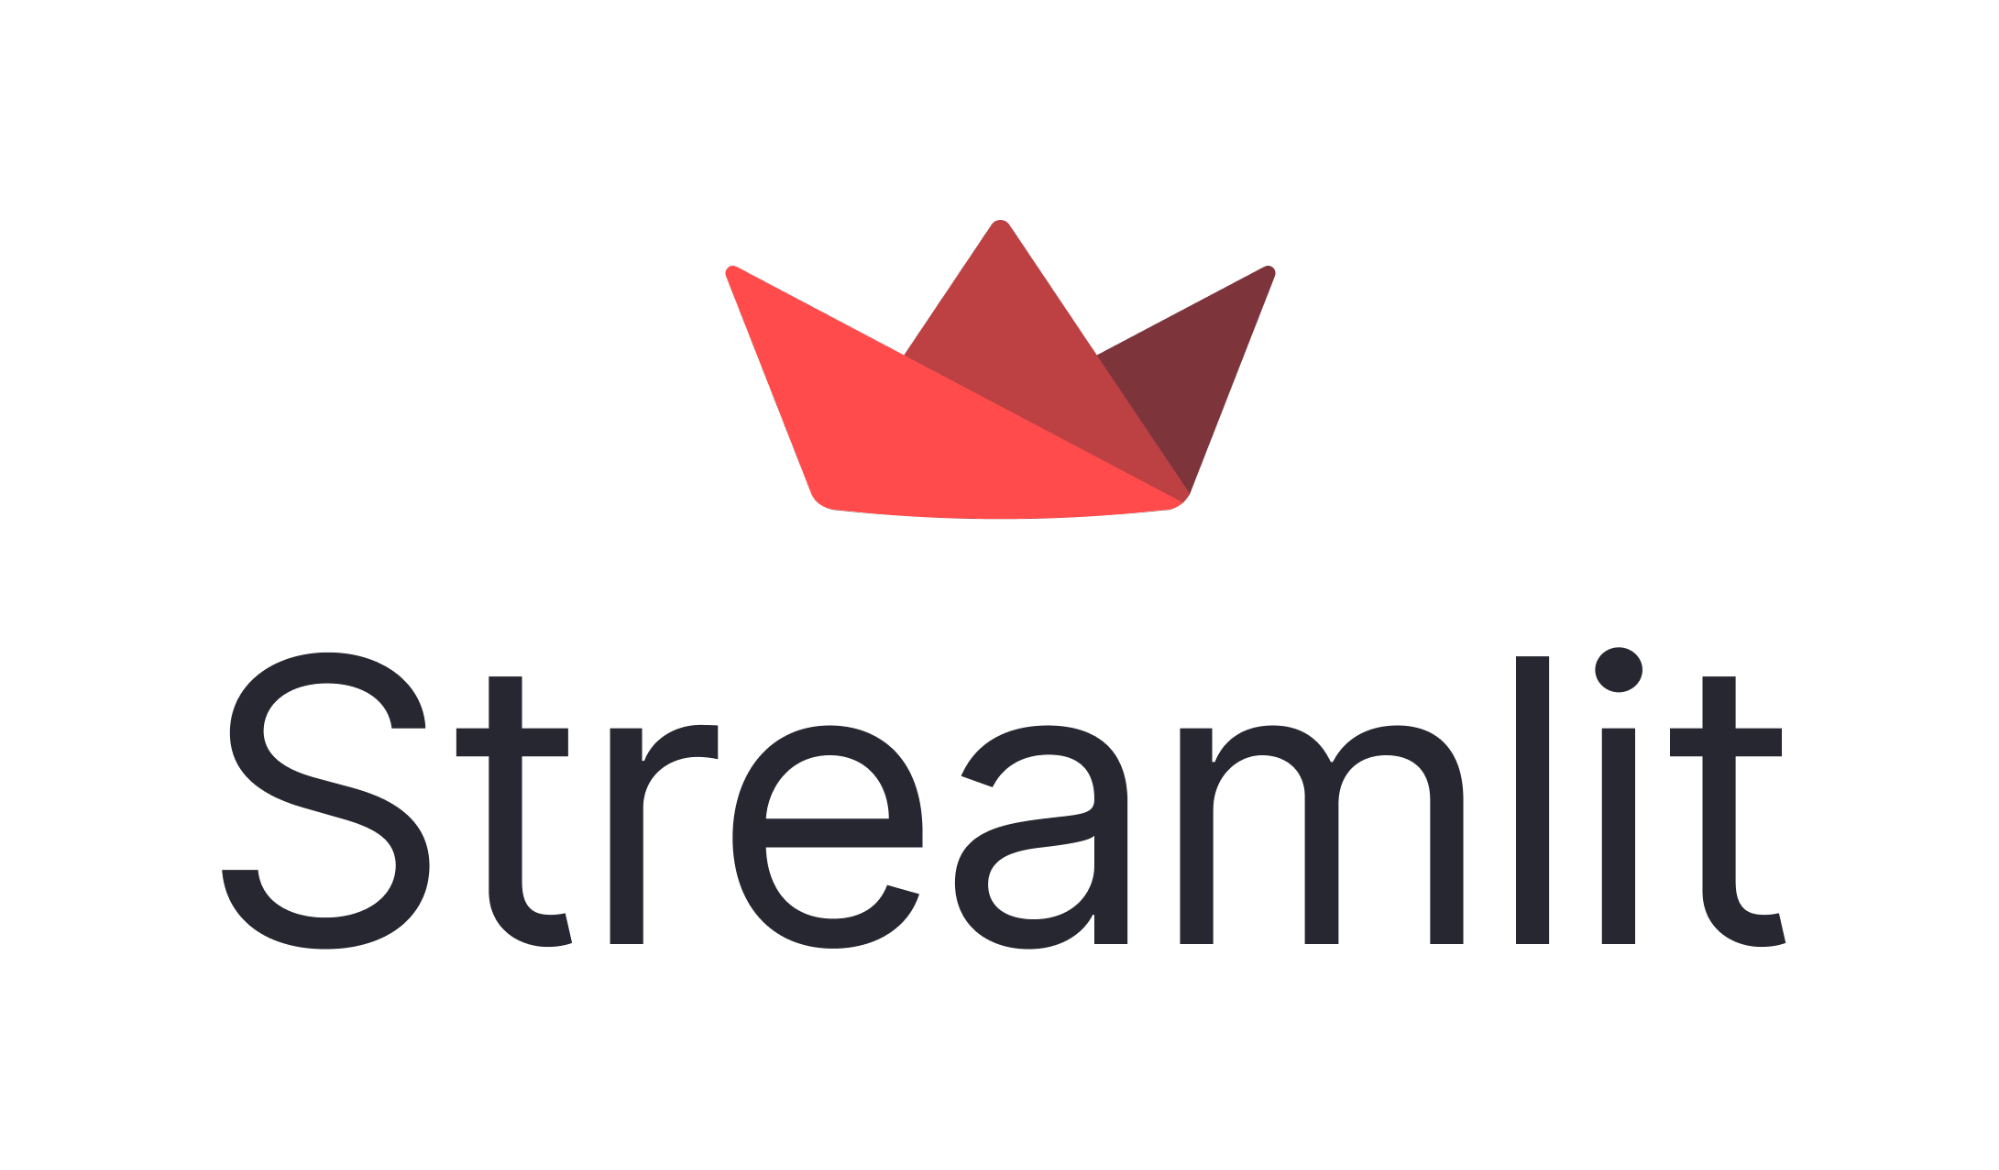

#### Passo a passo (resumido) para criar uma interface web com Streamlit
1. Crie o arquivo .py
2. Escrever o código com elementos do Streamlit
3. Salve o arquivo
4. Execute no terminal: streamlit run seu_arquivo.py
5. Acesse no navegador: http://localhost:8501

In [5]:
#!pip install streamlit

In [52]:
def gerar_codigo_streamlit():
    import streamlit as st
    import pymysql
    import pandas as pd
    import time

    st.set_page_config(page_title="GRANT / REVOKE", layout="centered")
    st.title("GRANT / REVOKE - Banco de Dados")

    # Função de conexão
    def conectar(usuario, senha):
        try:
            conn = pymysql.connect(
                host="localhost",
                user=usuario,
                password=senha,
                database="sistema_empresa"  # ajuste conforme seu banco
            )
            return conn
        except pymysql.MySQLError as err:
            st.error(f"Erro de conexão: {err}")
            return None

    # Estado da sessão
    if "logged_in" not in st.session_state:
        st.session_state.logged_in = False
    if "conn" not in st.session_state:
        st.session_state.conn = None
    if "user" not in st.session_state:
        st.session_state.user = None

    # Interface de Login
    if not st.session_state.logged_in:
        user = st.text_input("Usuário")
        password = st.text_input("Senha", type="password")

        if st.button("Entrar"):
            conn = conectar(user, password)
            if conn:
                st.session_state.logged_in = True
                st.session_state.conn = conn
                st.session_state.user = user
                st.success(f"Usuário {user} conectado com sucesso!")
                time.sleep(1.5)
                st.rerun() 

    # Interface principal
    else:
        st.write(f"Usuário conectado: **{st.session_state.user}**")

        query = st.text_area("Digite um comando SQL:")

        if st.button("Executar Query"):
            try:
                cursor = st.session_state.conn.cursor()
                cursor.execute(query)

                if query.strip().lower().startswith("select"):
                    rows = cursor.fetchall()
                    cols = [desc[0] for desc in cursor.description]
                    df = pd.DataFrame(rows, columns=cols)
                    st.dataframe(df)
                else:
                    st.session_state.conn.commit()
                    st.success("Operação realizada com sucesso!")
                cursor.close()
            except pymysql.MySQLError as err:
                st.error(f"Erro SQL: {err}")

        if st.button("Sair"):
            if st.session_state.conn:
                st.session_state.conn.close()
            st.session_state.logged_in = False
            st.session_state.conn = None
            st.success("Logout realizado com sucesso.")

In [53]:
import inspect, textwrap

# Extrai o código da função e salva no arquivo .py 
codigo_streamlit = textwrap.dedent(inspect.getsource(gerar_codigo_streamlit))

# remove a primeira linha "def gerar_codigo_streamlit():" e o recuo
codigo_streamlit = "\n".join(codigo_streamlit.splitlines()[1:])
codigo_streamlit = textwrap.dedent(codigo_streamlit)

# Mostra o código que será salvo como .py
codigo_streamlit

'import streamlit as st\nimport pymysql\nimport pandas as pd\nimport time\n\nst.set_page_config(page_title="GRANT / REVOKE", layout="centered")\nst.title("GRANT / REVOKE - Banco de Dados")\n\n# Função de conexão\ndef conectar(usuario, senha):\n    try:\n        conn = pymysql.connect(\n            host="localhost",\n            user=usuario,\n            password=senha,\n            database="sistema_empresa"  # ajuste conforme seu banco\n        )\n        return conn\n    except pymysql.MySQLError as err:\n        st.error(f"Erro de conexão: {err}")\n        return None\n\n# Estado da sessão\nif "logged_in" not in st.session_state:\n    st.session_state.logged_in = False\nif "conn" not in st.session_state:\n    st.session_state.conn = None\nif "user" not in st.session_state:\n    st.session_state.user = None\n\n# Interface de Login\nif not st.session_state.logged_in:\n    user = st.text_input("Usuário")\n    password = st.text_input("Senha", type="password")\n\n    if st.button("Entr

In [54]:
with open("app_streamlit.py", "w", encoding="utf-8") as f:
    f.write(codigo_streamlit)

print("Arquivo 'app_streamlit.py' criado com sucesso!")

Arquivo 'app_streamlit.py' criado com sucesso!


### Execute o seu app_streamlit a partir do Jupyter

In [65]:
!streamlit run app_streamlit.py

### Execute o seu app_streamlit como subprocess controlado

In [62]:
import subprocess
process = subprocess.Popen(["streamlit", "run", "app_streamlit.py"]) # Inicia o Streamlit como processo separado

In [64]:
process.terminate() # Encerra o processo

### Você tambám pode executar o app_streamlit informando o local onde está armazenado
- O comando abaixo pode ser executar aqui no Jupyter ou via terminal (cmd)

In [56]:
#!cd /d seu_diretorio && streamlit run app_streamlit.py